In [30]:

from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv


In [0]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [32]:
df = pd.read_csv("covid_19_clean_complete.csv", delimiter=",")
df.groupby(['Country/Region']).sum()
a = df['Country/Region']
print(a)
df.groupby(['Confirmed']).sum()
b = df['Confirmed']
print(b)
# date = [elem for elem in df['Date']]
# values = [elem for elem in df['Confirmed']]
# plt.xticks(range(0,len(date)),rotation=45)
# plt.plot(country, values)
df = pd.read_csv("covid_19_clean_complete.csv")
df.tail(5)

0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
32060    Sao Tome and Principe
32061                    Yemen
32062                  Comoros
32063               Tajikistan
32064                  Lesotho
Name: Country/Region, Length: 32065, dtype: object
0           0
1           0
2           0
3           0
4           0
         ... 
32060     251
32061     197
32062      34
32063    2350
32064       1
Name: Confirmed, Length: 32065, dtype: int64


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [0]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='Recovered'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Recovered']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='Recovered'):
    ts=df.loc[(df['Country/Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Recovered']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case], label='RecoveredCases')
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    #plt.plot('Confirmed', label='First Line')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

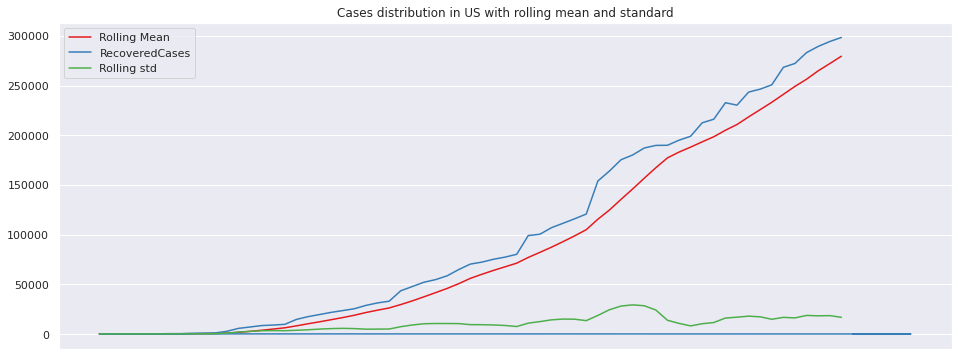

In [36]:
tsC1=roll('US')
rollPlot('US')

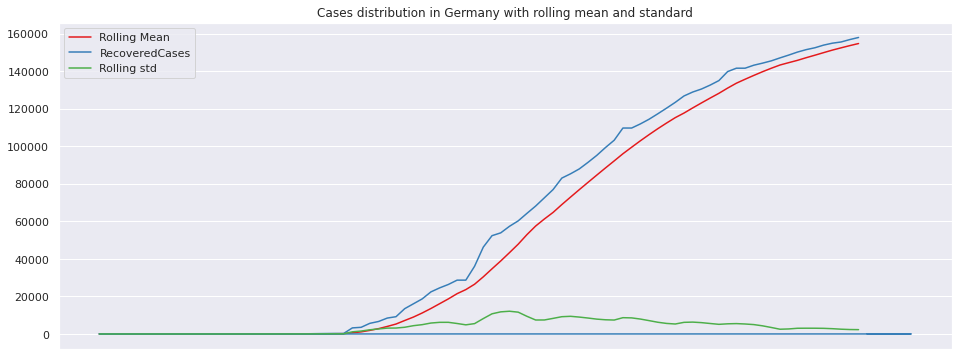

In [37]:
tsC2=roll('Germany')
rollPlot('Germany')

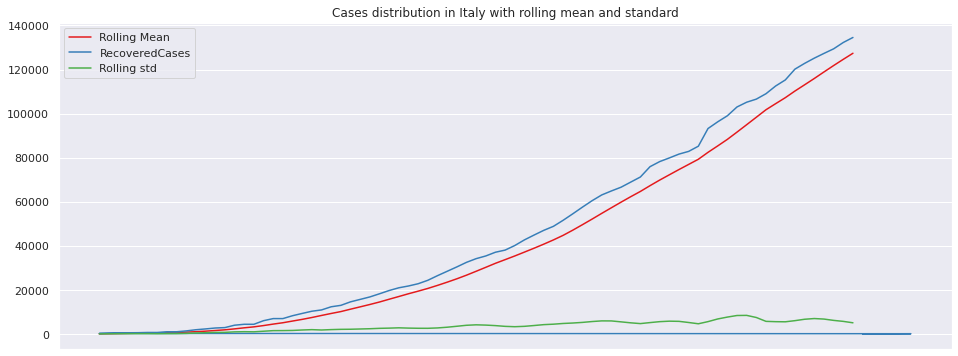

In [38]:
tsC3=roll('Italy')
rollPlot('Italy')

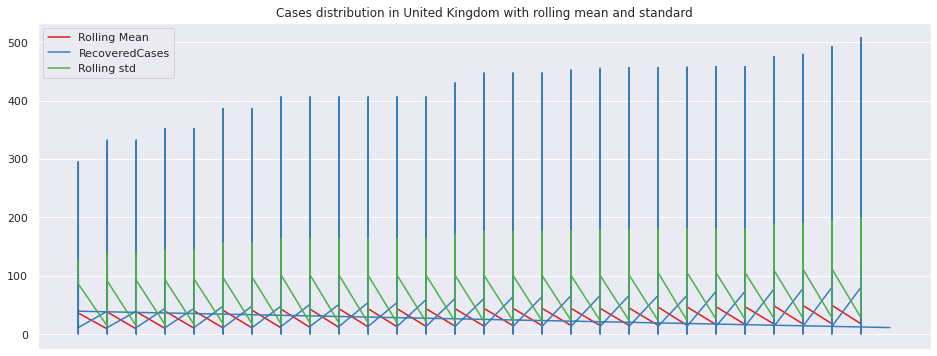

In [39]:
tsC4=roll('United Kingdom')
rollPlot('United Kingdom')

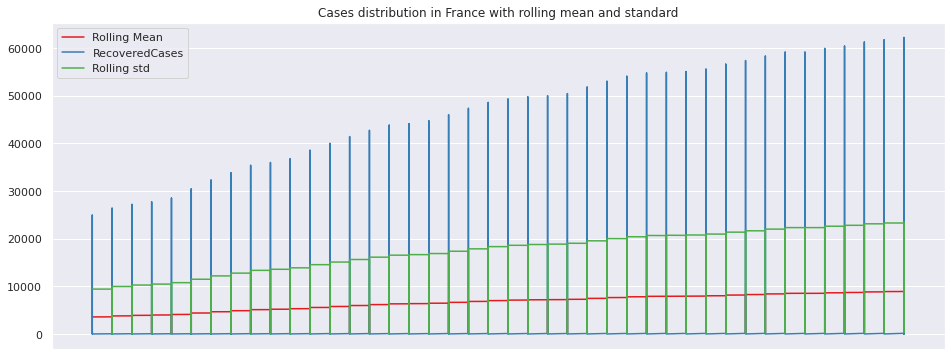

In [40]:
tsC5=roll('France')
rollPlot('France')

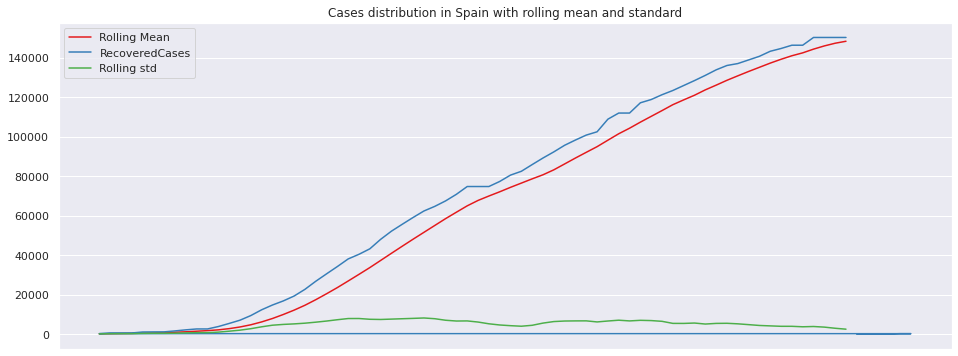

In [41]:
tsC6=roll('Spain')
rollPlot('Spain')

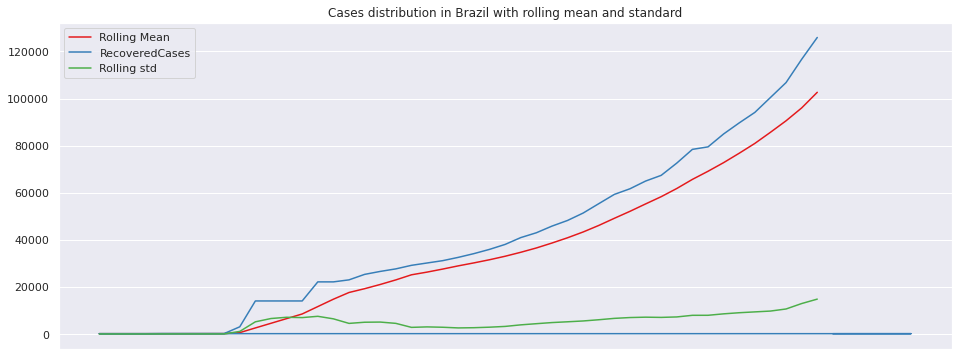

In [42]:
tsC7=roll('Brazil')
rollPlot('Brazil')

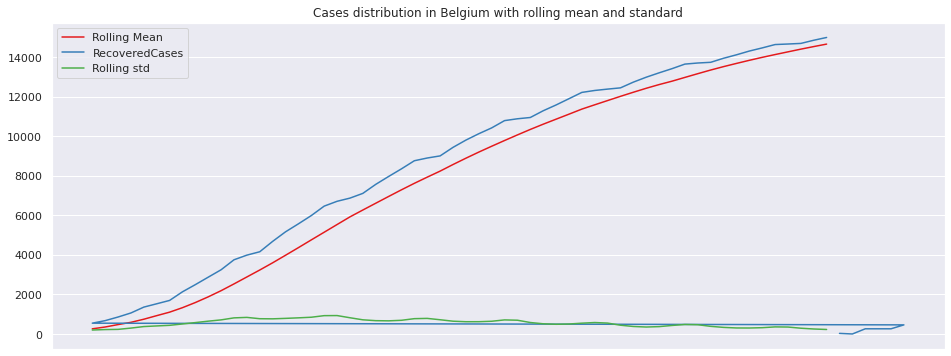

In [43]:
tsC8=roll('Belgium')
rollPlot('Belgium')

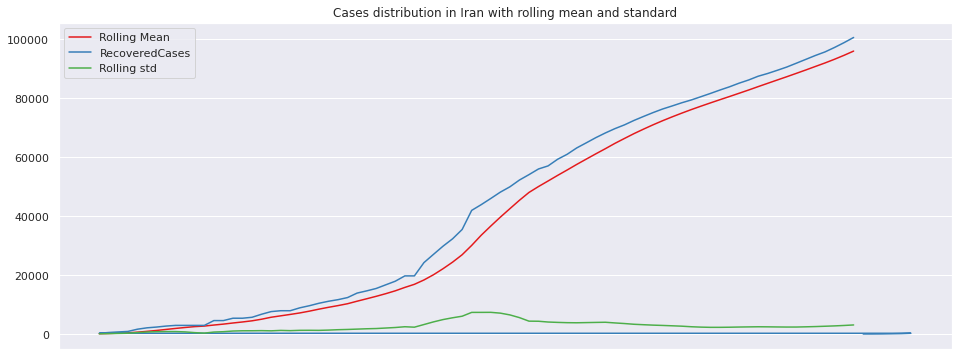

In [44]:
tsC9=roll('Iran')
rollPlot('Iran')

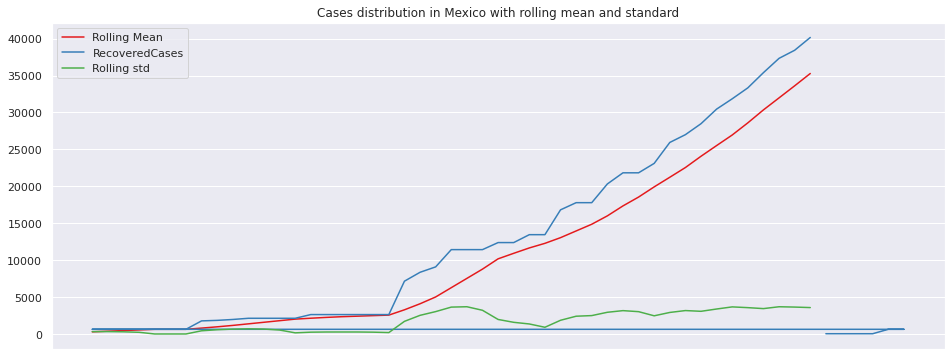

In [45]:
tsC10=roll('Mexico')
rollPlot('Mexico')

In [46]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For US
tsC=tsC1['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.348565
p-value                         0.979466
#Lags Used                      9.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [47]:
#For Germany
tsC=tsC2['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.011717
p-value                         0.748967
#Lags Used                     10.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


In [48]:
#For Italy
tsC=tsC3['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.078939
p-value                         0.723397
#Lags Used                      9.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [49]:
#For UK
tsC=tsC4['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -0.964602
p-value                          0.765955
#Lags Used                      16.000000
Number of Observations Used    289.000000
Critical Value (1%)             -3.453182
Critical Value (5%)             -2.871593
Critical Value (10%)            -2.572127
dtype: float64


In [50]:
#For France
tsC=tsC5['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  -2.900862
p-value                          0.045248
#Lags Used                      18.000000
Number of Observations Used    436.000000
Critical Value (1%)             -3.445438
Critical Value (5%)             -2.868192
Critical Value (10%)            -2.570313
dtype: float64


In [51]:
#For Spain
tsC=tsC6['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.026216
p-value                         0.743583
#Lags Used                      8.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [52]:
#For Brazil
tsC=tsC7['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  2.009192
p-value                         0.998685
#Lags Used                      1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [53]:
#For Belgium
tsC=tsC8['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -3.739795
p-value                         0.003587
#Lags Used                      8.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [54]:
#For Iran
tsC=tsC9['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  0.109893
p-value                         0.966730
#Lags Used                     12.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


In [55]:
#For Mexico
tsC=tsC10['Recovered'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                  1.721813
p-value                         0.998181
#Lags Used                      8.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64
